In [1]:
"""
Web scraping price information from www.mediamarkt.es
Based on:
https://github.com/Brinkhuis/Mediamarkt/blob/master/code/mediamarkt.py
"""

import ast
import requests
import urllib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import time

from bs4 import BeautifulSoup
from tqdm import tqdm

%matplotlib inline

In [2]:
# URL dónde está la lista de productos
URL = "https://www.mediamarkt.es/sitemap/sitemap-productlist.xml"

In [3]:
# Defino la función para leer el xml y extraer los links que pasaremos
# Referencia:
# https://stackoverflow.com/questions/18966368/python-beautifulsoup-scrape-tables
# Le paso la URL como parámetro, así podrá valer para los diferentes sitios.
def get_products (URL):
    soup = BeautifulSoup(requests.get(URL).text, 'lxml')
    #links = soup.find_all('loc')
    links = []
    #links = soup.find_all("loc")
    for link in soup.find_all("loc"):
        links.append(str(link).replace("<loc>","").replace("</loc>",""))
    return links

In [4]:
pagelinks = get_products(URL)

In [5]:
pagelinks[1:10]

['https://www.mediamarkt.es/es/category/_afeitado-y-depilaci%C3%B3n-701138.html',
 'https://www.mediamarkt.es/es/category/_afeitadoras-faciales-701281.html',
 'https://www.mediamarkt.es/es/category/_afeitadoras-corporales-701282.html',
 'https://www.mediamarkt.es/es/category/_afeitadoras-multifunci%C3%B3n-701283.html',
 'https://www.mediamarkt.es/es/category/_cortapelos-701284.html',
 'https://www.mediamarkt.es/es/category/_barberos-701285.html',
 'https://www.mediamarkt.es/es/category/_depiladoras-ipl-701286.html',
 'https://www.mediamarkt.es/es/category/_rasuradoras-701287.html',
 'https://www.mediamarkt.es/es/category/_depiladoras-de-arranque-701288.html']

In [6]:
#Compruebo los pagelinks
len(pagelinks)

1012

In [7]:
#URL = "https://www.mediamarkt.es/es/category/_afeitadoras-faciales-701281.html"
#URL = 'http://www.mediamarkt.nl/nl/category/_laptops-482723.html'

In [20]:
def npages(mysoup):
    pagination = list()
    npages = 0
    for page_number in mysoup.find_all('div', {'class': 'pagination-wrapper cf'}):
        pagination.append(page_number.find_all('a'))
        npages = int(str(pagination[0]).split(', ')[-2].strip('</a>').split('>')[-1])
        print (npages)
    return npages        


def get_data(URL, output_file = None):
    item_list = list()
    #npages = npages(BeautifulSoup(requests.get(URL).text, 'html.parser')
    for page in tqdm(range(1, npages(BeautifulSoup(requests.get(URL).text, 'html.parser')) + 1)):
        soup = BeautifulSoup(requests.get(URL + '?page=' + str(page)).text, 'html.parser')
        all_scripts = soup.find_all('script')
        for script in all_scripts:
            if script.text.startswith('var product'):
                item_list.append(ast.literal_eval(script.text.split(' = ')[1].strip(';')))

    productinfo = pd.DataFrame()
    
    productinfo = pd.DataFrame(item_list)
    
    #productinfo['price'] = pd.to_numeric(productinfo['price'], errors='coerce')
    
    #productinfo.to_csv(output_file, index=False)
    
    #print(f'{productinfo.shape[0]} records saved to {output_file}')
    
    return productinfo

In [21]:
#pro_info = get_data()

In [22]:
#output_file = './belleza_y_salud.csv'
#pro_info.to_csv(output_file)

In [23]:
#print(f'{pro_info.shape[0]} records saved to {output_file}')

In [35]:
def viz_data(input_file, output_file):
    productinfo = pd.read_csv(input_file)

    x_pixels, y_pixels, dpi = 1500, 8000, 150
    x_inch, y_inch = x_pixels / dpi, y_pixels / dpi

    plt.figure(figsize=(x_inch, y_inch), dpi=dpi)
    sns.boxplot(x='price',
                y='brand',
                data=productinfo.groupby('brand').filter(lambda x: len(x) > 3),
                order=list(productinfo.groupby('brand').filter(lambda x: len(x) > 3)
                           .groupby('brand').price.median().sort_values(ascending=False).index),
                palette='PRGn',
                width=0.75).set_title('Price Distribution per Brand')
    sns.despine(offset=10, trim=True)
    plt.savefig(output_file)
    plt.show()
    plt.close()
    
    print(f'Visualization saved to {output_file}')


In [32]:
#def main():
dat = './data/productinfo.csv'
viz = './plots/price_distribution_brand.png'

# Limito a los 10 primeras líneas
products = pd.DataFrame()
total_products = pd.DataFrame()
for link in pagelinks[2:100]:
    products = get_data(link, dat)
    time.sleep(2)
    total_products = total_products.append(products)
        
print("Done")


3


100%|██████████| 3/3 [00:02<00:00,  1.30it/s]
0it [00:00, ?it/s]


3


100%|██████████| 3/3 [00:02<00:00,  1.15it/s]


5


100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


3


100%|██████████| 3/3 [00:02<00:00,  1.14it/s]


2


100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
0it [00:00, ?it/s]


3


100%|██████████| 3/3 [00:03<00:00,  1.03s/it]


2


100%|██████████| 2/2 [00:02<00:00,  1.24s/it]
0it [00:00, ?it/s]


5


100%|██████████| 5/5 [00:04<00:00,  1.13it/s]


5


100%|██████████| 5/5 [00:04<00:00,  1.00it/s]


4


100%|██████████| 4/4 [00:05<00:00,  1.29s/it]


2


100%|██████████| 2/2 [00:02<00:00,  1.21s/it]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


4


100%|██████████| 4/4 [00:04<00:00,  1.02s/it]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


2


100%|██████████| 2/2 [00:02<00:00,  1.07s/it]


4


100%|██████████| 4/4 [00:04<00:00,  1.09s/it]
0it [00:00, ?it/s]


2


100%|██████████| 2/2 [00:02<00:00,  1.06s/it]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


5


100%|██████████| 5/5 [00:05<00:00,  1.09it/s]
0it [00:00, ?it/s]


2


100%|██████████| 2/2 [00:01<00:00,  1.28it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


3


100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


2


100%|██████████| 2/2 [00:02<00:00,  1.30s/it]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


4


100%|██████████| 4/4 [00:03<00:00,  1.36it/s]


4


100%|██████████| 4/4 [00:03<00:00,  1.15it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


3


100%|██████████| 3/3 [00:03<00:00,  1.27s/it]
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


2


100%|██████████| 2/2 [00:01<00:00,  1.08it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


3


100%|██████████| 3/3 [00:03<00:00,  1.07s/it]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


3


100%|██████████| 3/3 [00:03<00:00,  1.21s/it]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


30


100%|██████████| 30/30 [00:32<00:00,  1.12s/it]
0it [00:00, ?it/s]


12


100%|██████████| 12/12 [00:13<00:00,  1.05s/it]


10


100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


2


100%|██████████| 2/2 [00:01<00:00,  1.56it/s]


4


100%|██████████| 4/4 [00:03<00:00,  1.19it/s]


3


100%|██████████| 3/3 [00:02<00:00,  1.49it/s]


61


100%|██████████| 61/61 [01:04<00:00,  1.01it/s]


20


100%|██████████| 20/20 [00:17<00:00,  1.28it/s]
0it [00:00, ?it/s]


4


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


4


100%|██████████| 4/4 [00:03<00:00,  1.19it/s]


2


100%|██████████| 2/2 [00:01<00:00,  1.41it/s]


2


100%|██████████| 2/2 [00:02<00:00,  1.07s/it]


9


100%|██████████| 9/9 [00:09<00:00,  1.09s/it]


21


100%|██████████| 21/21 [00:21<00:00,  1.16s/it]


8


100%|██████████| 8/8 [00:08<00:00,  1.03it/s]


3


100%|██████████| 3/3 [00:02<00:00,  1.11it/s]


11


100%|██████████| 11/11 [00:11<00:00,  1.09it/s]
0it [00:00, ?it/s]


9


100%|██████████| 9/9 [00:09<00:00,  1.00s/it]


5


100%|██████████| 5/5 [00:05<00:00,  1.03s/it]


4


100%|██████████| 4/4 [00:05<00:00,  1.32s/it]


12


100%|██████████| 12/12 [00:16<00:00,  1.44s/it]


10


100%|██████████| 10/10 [00:13<00:00,  1.33s/it]


3


100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


11


100%|██████████| 11/11 [00:09<00:00,  1.11it/s]
0it [00:00, ?it/s]


2


100%|██████████| 2/2 [00:01<00:00,  1.18it/s]


2


100%|██████████| 2/2 [00:01<00:00,  1.13it/s]
0it [00:00, ?it/s]


3


100%|██████████| 3/3 [00:03<00:00,  1.02s/it]


4


100%|██████████| 4/4 [00:03<00:00,  1.06it/s]


10


100%|██████████| 10/10 [00:09<00:00,  1.03it/s]


2


100%|██████████| 2/2 [00:02<00:00,  1.33s/it]


Done


In [47]:
#if __name__ == "__main__":
#    main()

In [33]:
total_products.to_csv(dat)

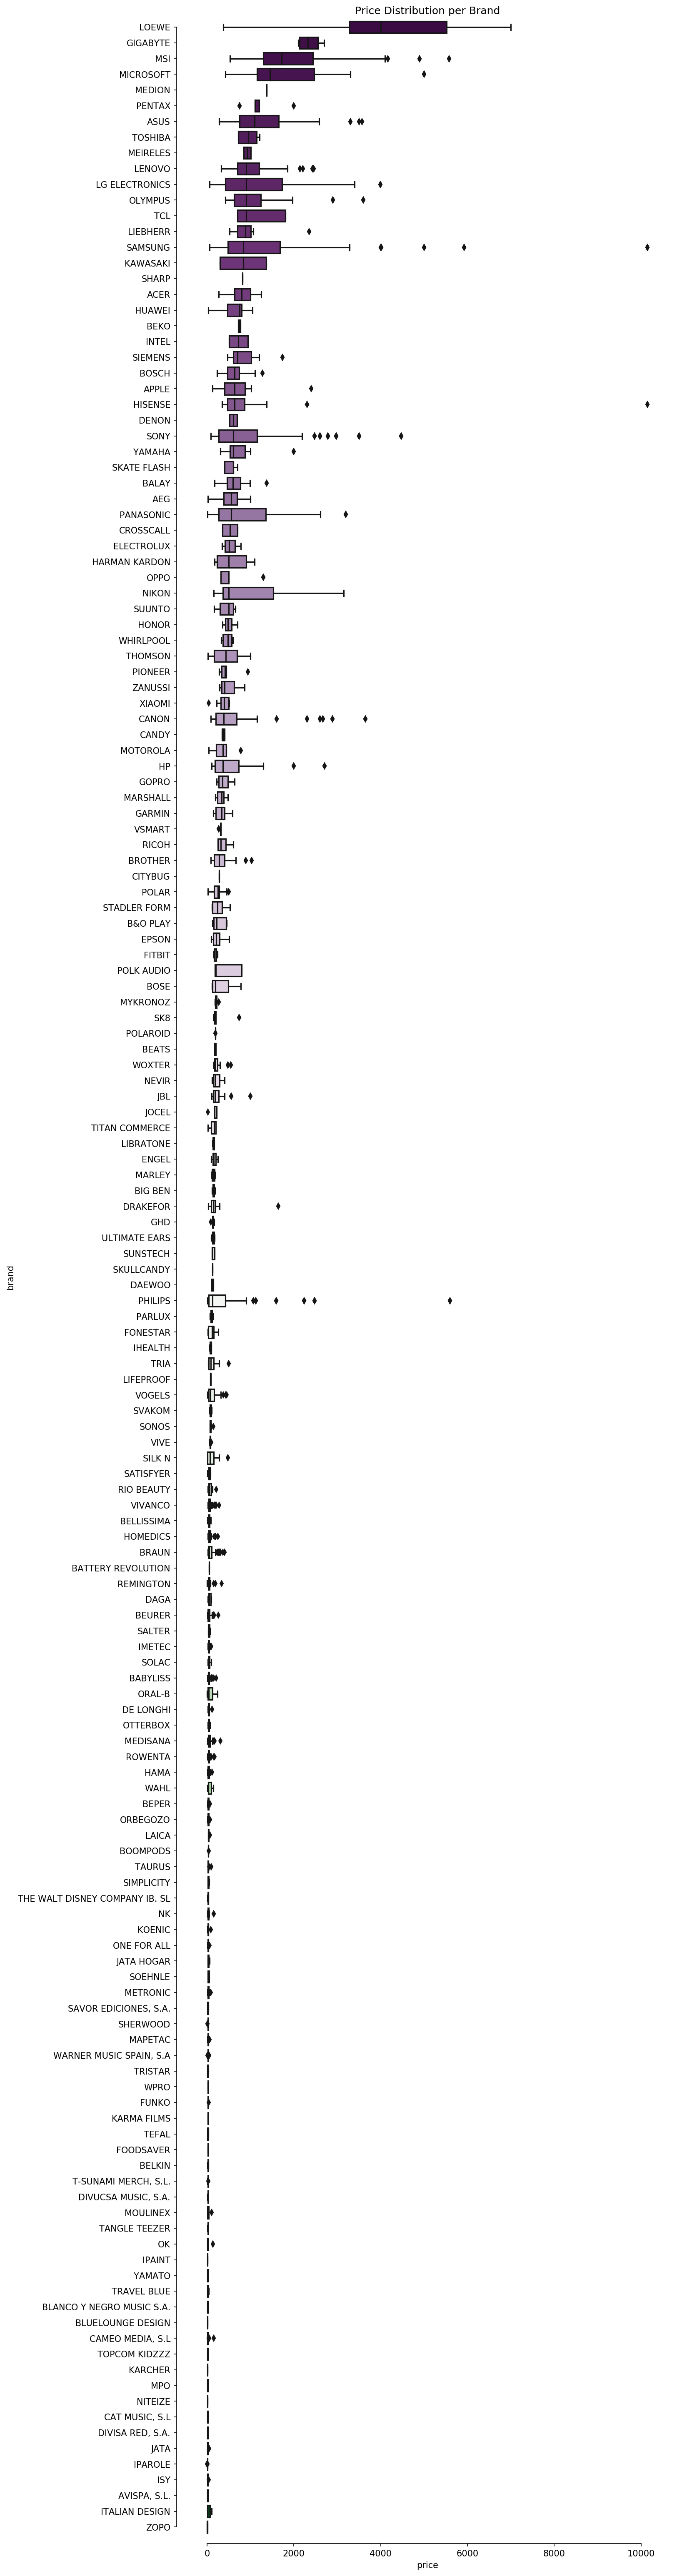

Visualization saved to ./plots/price_distribution_brand.png


In [36]:
viz_data(dat, viz)